Paper link https://link.springer.com/article/10.1007/s11042-023-16745-4

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('diabetes2.csv')

In [3]:
df.shape

(5000, 10)

In [4]:
df.columns

Index(['PatientID', 'Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure',
       'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age',
       'Diabetic'],
      dtype='object')

In [5]:
df.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1142956,1,78,41,33,311,50.796392,0.420804,24,0
1,1823377,0,116,92,16,184,18.603630,0.131156,22,0
2,1916381,8,171,42,29,160,35.482247,0.082671,22,1
3,1247480,3,108,63,45,297,49.375169,0.100979,46,1
4,1516947,8,153,99,15,41,35.062139,0.116191,22,1


In [6]:
print(df.isnull().sum())

PatientID                 0
Pregnancies               0
PlasmaGlucose             0
DiastolicBloodPressure    0
TricepsThickness          0
SerumInsulin              0
BMI                       0
DiabetesPedigree          0
Age                       0
Diabetic                  0
dtype: int64


Feature selection:

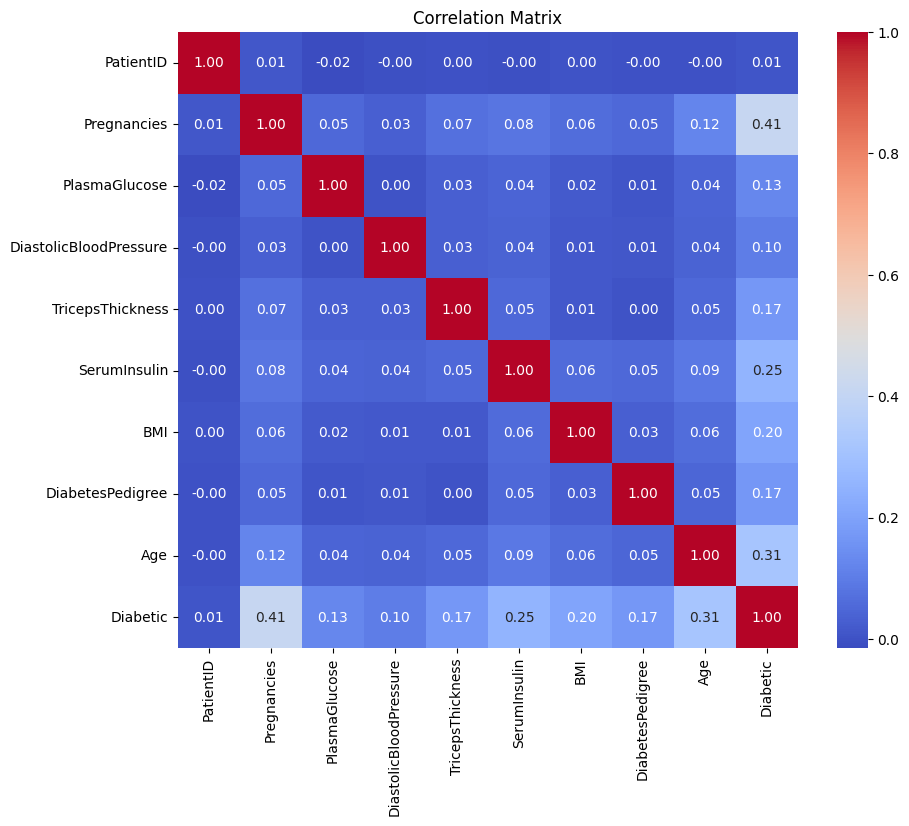

In [7]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [8]:
df = df.drop(columns=["PatientID"], errors="ignore")

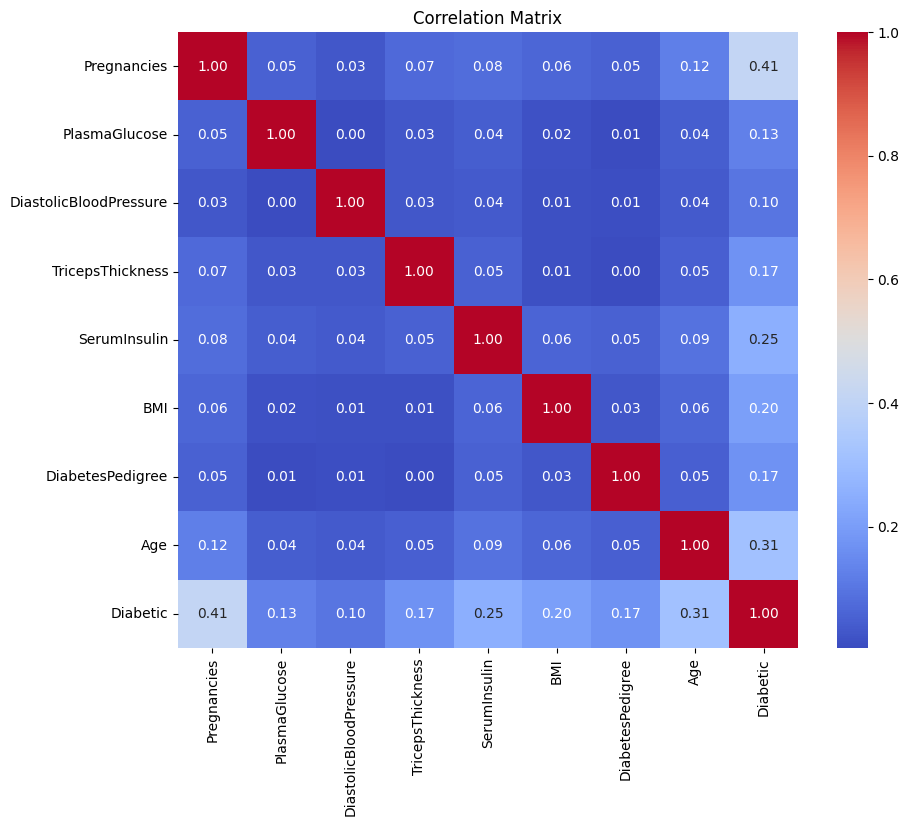

In [9]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [10]:
numerical_columns=['Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure',
       'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age']

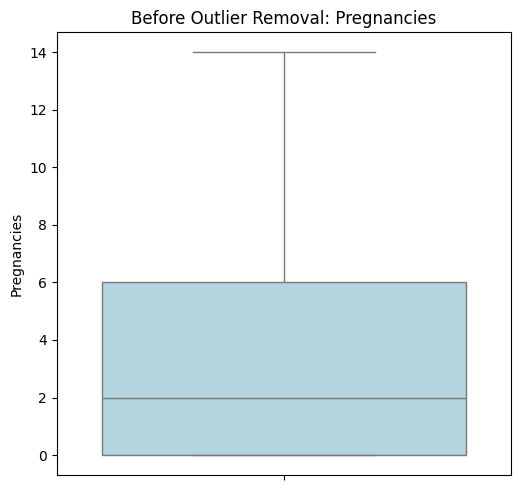

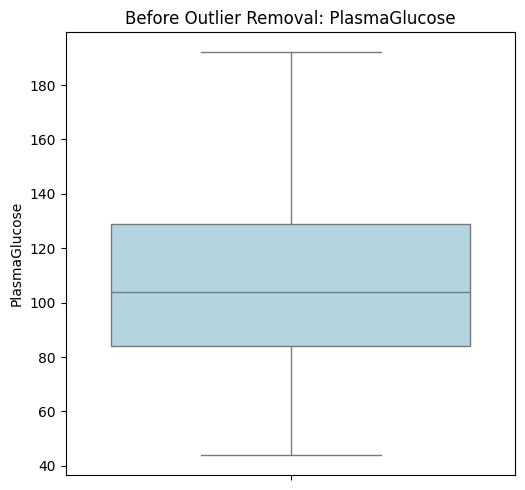

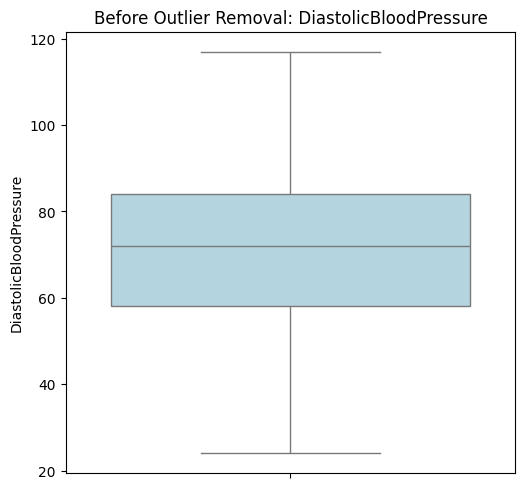

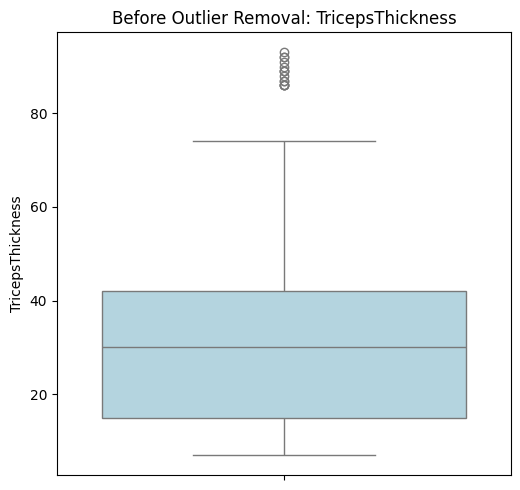

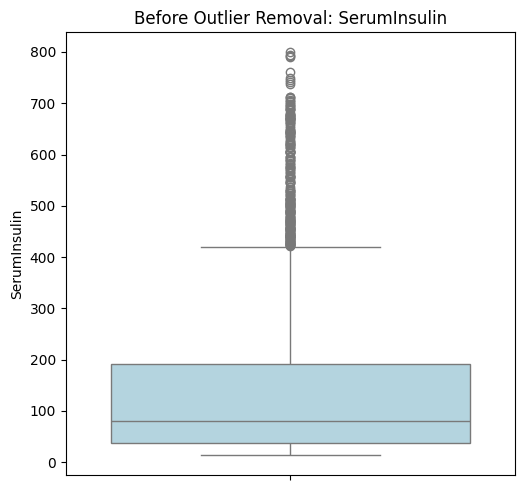

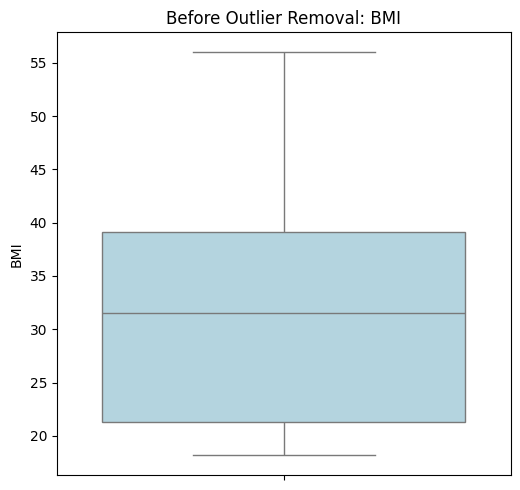

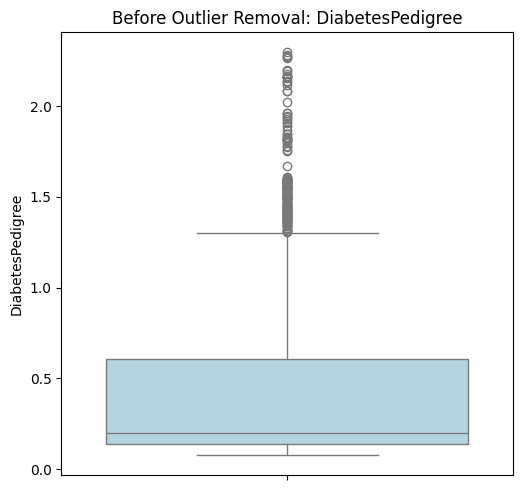

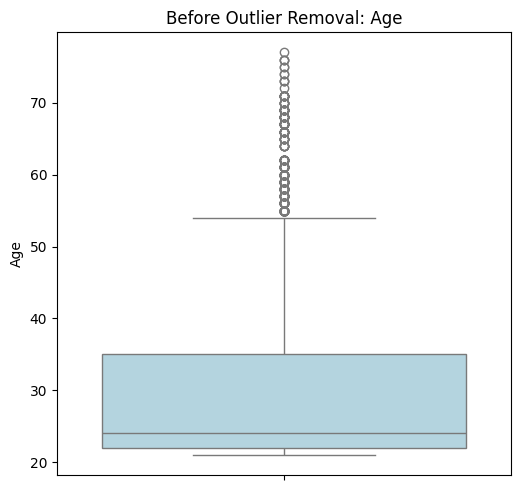

In [11]:
for col in numerical_columns:
    plt.figure(figsize=(10, 5))

    # Before removal
    plt.subplot(1, 2, 1)
    sns.boxplot(y=df[col], color='lightblue')
    plt.title(f"Before Outlier Removal: {col}")


    plt.tight_layout()
    plt.show()

In [12]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Filter out rows with outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

df_cleaned = remove_outliers_iqr(df, numerical_columns)
print(df_cleaned)

      Pregnancies  PlasmaGlucose  DiastolicBloodPressure  TricepsThickness  \
0               1             78                      41                33   
1               0            116                      92                16   
2               8            171                      42                29   
3               3            108                      63                45   
4               8            153                      99                15   
...           ...            ...                     ...               ...   
4994            0             72                      99                32   
4995           10             65                      60                46   
4996            2             73                      66                27   
4997            0             93                      89                43   
4998            0            132                      98                18   

      SerumInsulin        BMI  DiabetesPedigree  Age  Diabetic 

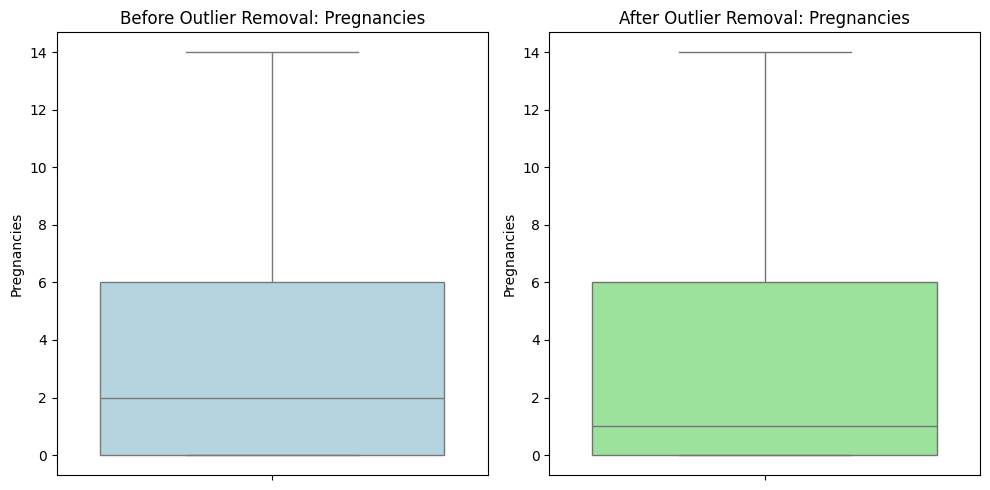

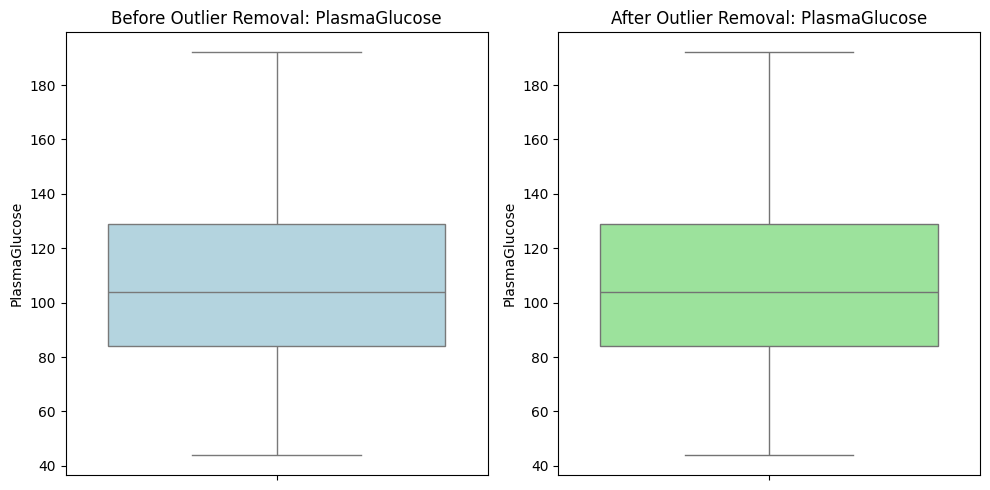

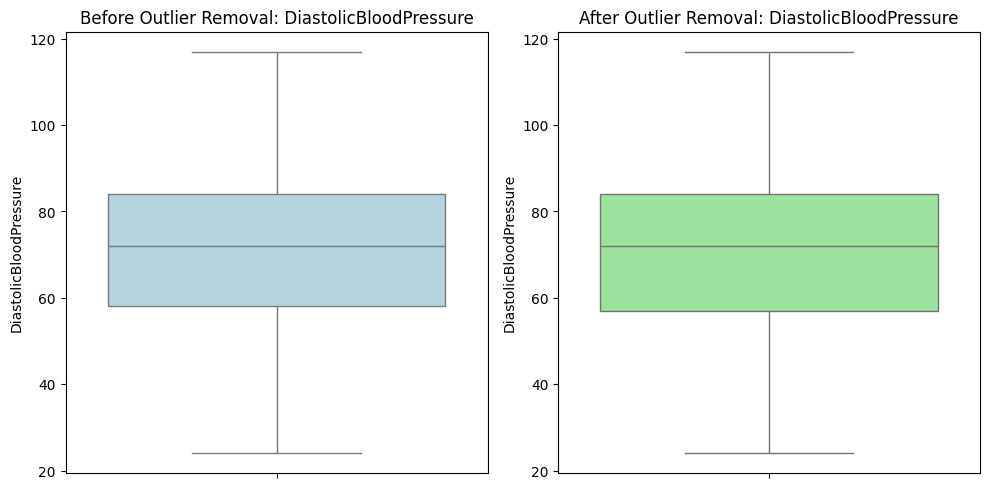

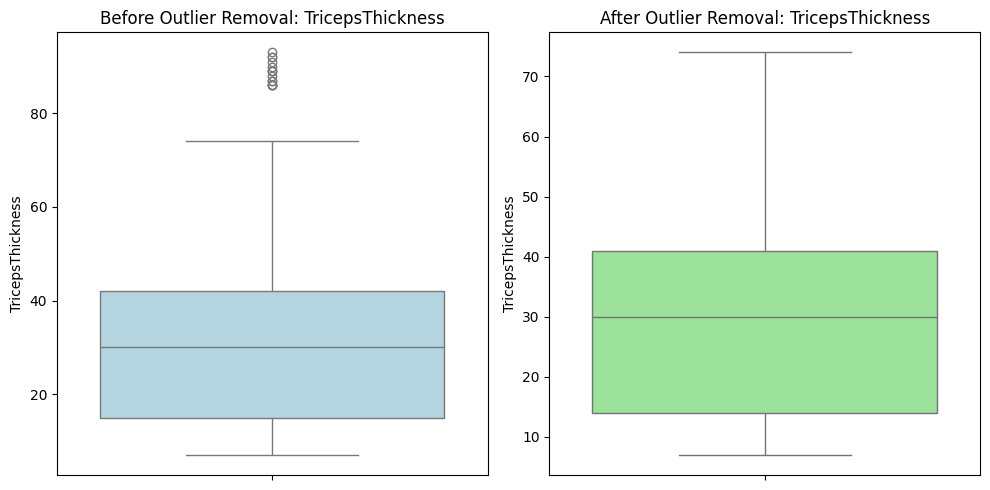

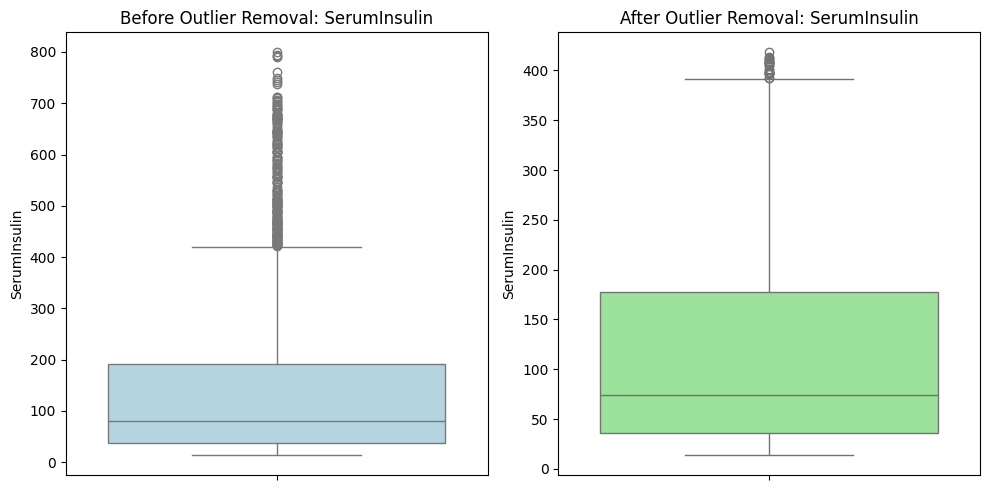

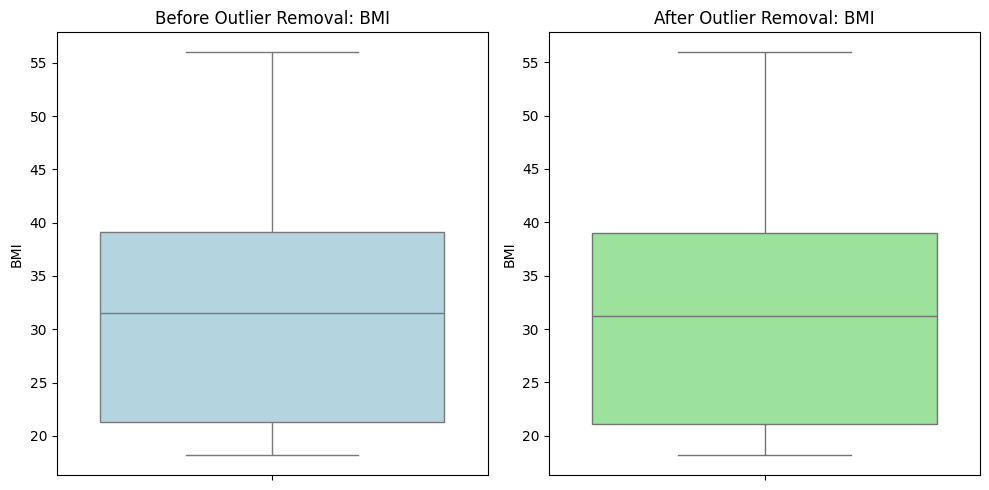

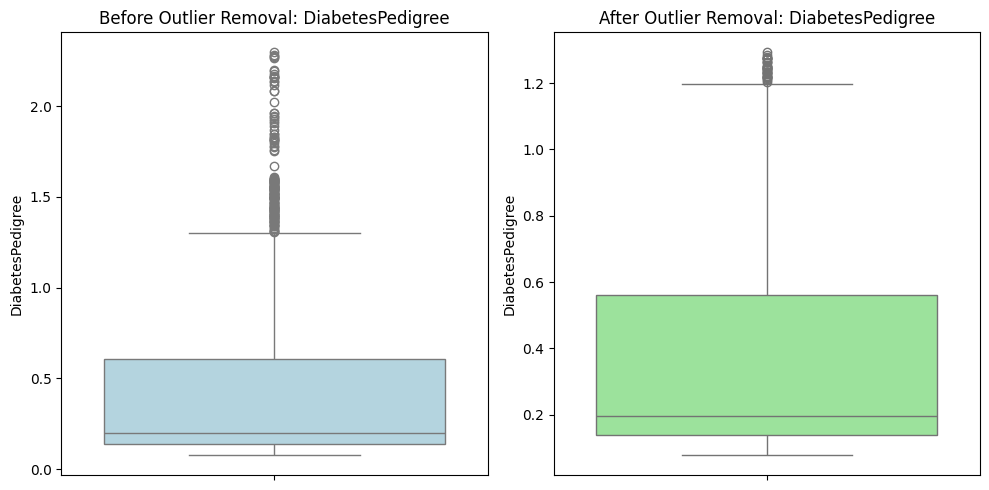

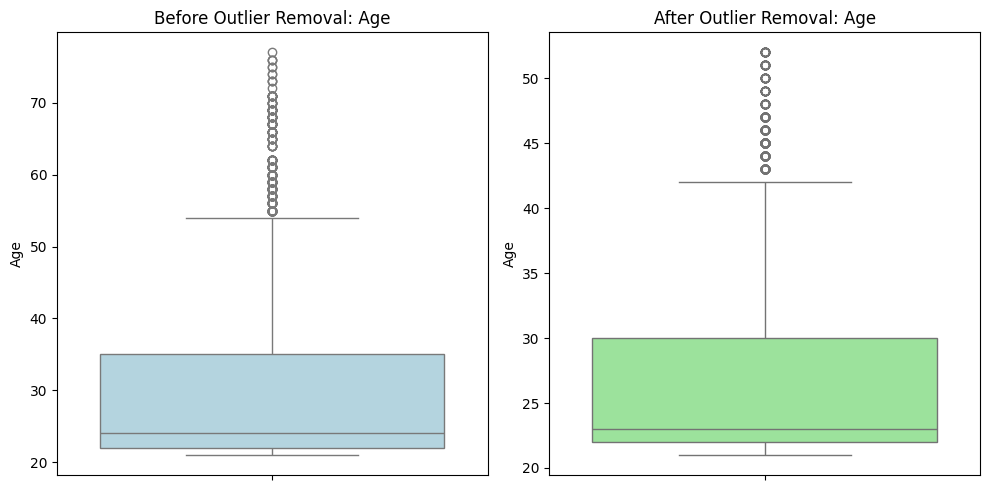

In [13]:
for col in numerical_columns:
    plt.figure(figsize=(10, 5))

    # Before removal
    plt.subplot(1, 2, 1)
    sns.boxplot(y=df[col], color='lightblue')
    plt.title(f"Before Outlier Removal: {col}")

    # After removal
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df_cleaned[col], color='lightgreen')
    plt.title(f"After Outlier Removal: {col}")

    plt.tight_layout()
    plt.show()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [15]:
X = df[['Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure',
        'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age']]
y = df['Diabetic']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the StandardScaler


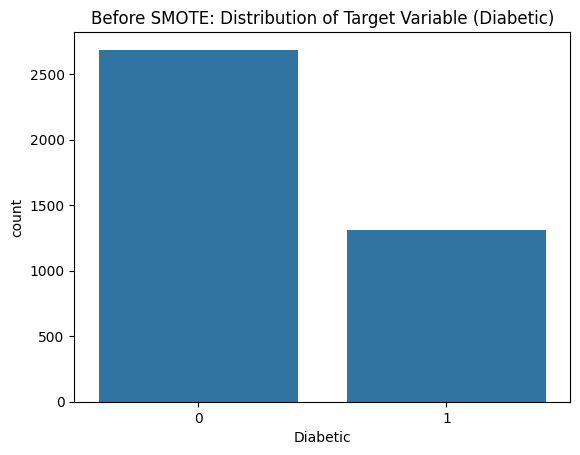

In [16]:
sns.countplot(x=y_train)
plt.title("Before SMOTE: Distribution of Target Variable (Diabetic)")
plt.show()

In [17]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

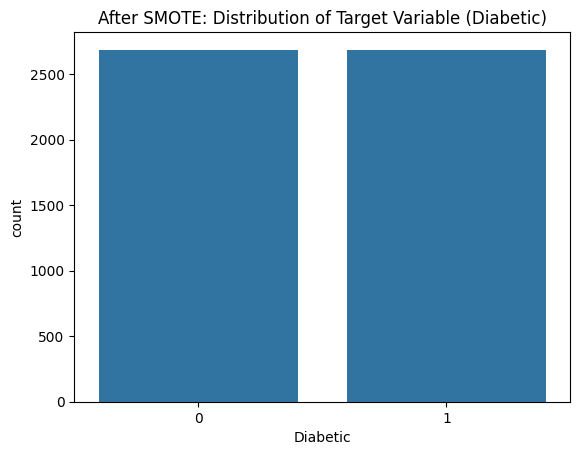

In [19]:
sns.countplot(x=y_train)
plt.title("After SMOTE: Distribution of Target Variable (Diabetic)")
plt.show()

In [20]:
scaler = StandardScaler()

# Fit the scaler on the training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import (
    RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
)
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix, precision_score, f1_score
)

In [22]:
classifiers = {
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0),
    "AdaBoost": AdaBoostClassifier(),
    "Bagging": BaggingClassifier(),
    "RandomForest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "NaiveBayes": GaussianNB(),
    "LogisticRegression": LogisticRegression()
}

# Evaluate each model
results = []

for name, model in classifiers.items():
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test_scaled)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')
    cm = confusion_matrix(y_test, y_pred)
    
    # Perform 10-fold cross-validation for accuracy
    cross_val = cross_val_score(model, X, y, cv=10, scoring='accuracy').mean()
    
    # Store the results
    results.append({
        "Classifier": name,
        "Accuracy": accuracy,
        "Accuracy (10-fold)": cross_val,
        "Precision": precision,
        "F1-Score": f1,
        "Confusion Matrix": cm.tolist()  # Store as list for easier display
    })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Display results
print(results_df)


[LightGBM] [Info] Number of positive: 2686, number of negative: 2686
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000636 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1131
[LightGBM] [Info] Number of data points in the train set: 5372, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 1491, number of negative: 3009
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000128 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1123
[LightGBM] [Info] Number of data points in the train set: 4500, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.331333 -> initscore=-0.702161
[LightGBM] [Info] Start training from score -0.702161
[LightGBM] 

c:\Users\SP23-RAI-014.CUI\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\SP23-RAI-014.CUI\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\SP23-RAI-014.CUI\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\SP23-RAI-014.CUI\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarn

           Classifier  Accuracy  Accuracy (10-fold)  Precision  F1-Score  \
0             XGBoost     0.948              0.9514   0.916667  0.924638   
1            LightGBM     0.943              0.9532   0.905983  0.917749   
2            CatBoost     0.948              0.9552   0.909605  0.925287   
3            AdaBoost     0.940              0.9458   0.887363  0.915014   
4             Bagging     0.917              0.9228   0.884273  0.877761   
5        RandomForest     0.928              0.9336   0.883523  0.896254   
6                 SVM     0.884              0.7926   0.798942  0.838889   
7          NaiveBayes     0.803              0.7938   0.691293  0.726768   
8  LogisticRegression     0.782              0.7806   0.648325  0.713158   

          Confusion Matrix  
0   [[629, 29], [23, 319]]  
1   [[625, 33], [24, 318]]  
2   [[626, 32], [20, 322]]  
3   [[617, 41], [19, 323]]  
4   [[619, 39], [44, 298]]  
5   [[617, 41], [31, 311]]  
6   [[582, 76], [40, 302]]  
7  [[54

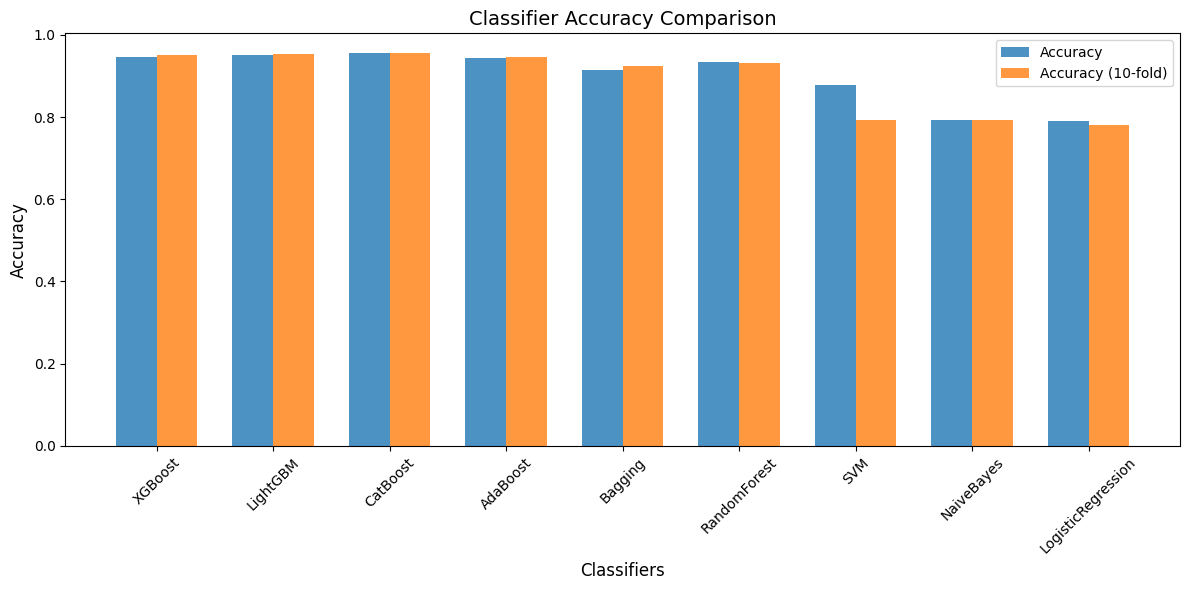

In [ ]:
# Visualization
plt.figure(figsize=(12, 6))
bar_width = 0.35
x = range(len(results_df['Classifier']))

# Plot Accuracy
plt.bar(x, results_df['Accuracy'], width=bar_width, label='Accuracy', alpha=0.8)

# Plot Accuracy (10-fold)
plt.bar([p + bar_width for p in x], results_df['Accuracy (10-fold)'], 
        width=bar_width, label='Accuracy (10-fold)', alpha=0.8)

# Add labels, title, and legend
plt.xlabel('Classifiers', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Classifier Accuracy Comparison', fontsize=14)
plt.xticks([p + bar_width / 2 for p in x], results_df['Classifier'], rotation=45)
plt.legend()
plt.tight_layout()

plt.show()